In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
Df = yf.download('GC=F', '2008-07-23', '2023-7-24', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [10]:
Df

,Open,High,Low,Close,Volume
Date,,,,,
2008-07-23,935.000000,935.000000,924.200012,922.400024,203
2008-07-24,920.900024,926.400024,920.900024,922.000000,47
2008-07-25,928.400024,929.200012,921.200012,926.599976,35
2008-07-28,928.799988,931.099976,927.000000,927.599976,28
2008-07-29,916.200012,917.700012,916.200012,916.400024,147310
...,...,...,...,...,...
2023-07-17,1954.000000,1956.500000,1946.599976,1952.400024,29
2023-07-18,1968.800049,1978.400024,1963.400024,1977.199951,83
2023-07-19,1977.000000,1977.500000,1973.000000,1977.500000,35


In [11]:
# Only keep close columns
df = Df[['Close']]

In [ ]:
print(df.info())  # Overview of columns, data types, and non-null counts
print(df.describe())  # Summary statistics of the numerical column(s)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3772 entries, 2008-07-23 to 2023-07-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3772 non-null   float64
dtypes: float64(1)
memory usage: 58.9 KB
None
             Close
count  3772.000000
mean   1416.489607
std     298.490650
min     704.900024
25%    1219.225037
50%    1324.400024
75%    1695.624969
max    2051.500000


In [12]:
df.tail()

,Close
Date,
2023-07-17,1952.400024
2023-07-18,1977.199951
2023-07-19,1977.500000
2023-07-20,1968.300049
2023-07-21,1964.300049


In [ ]:
df.to_csv('Gold_data.csv')

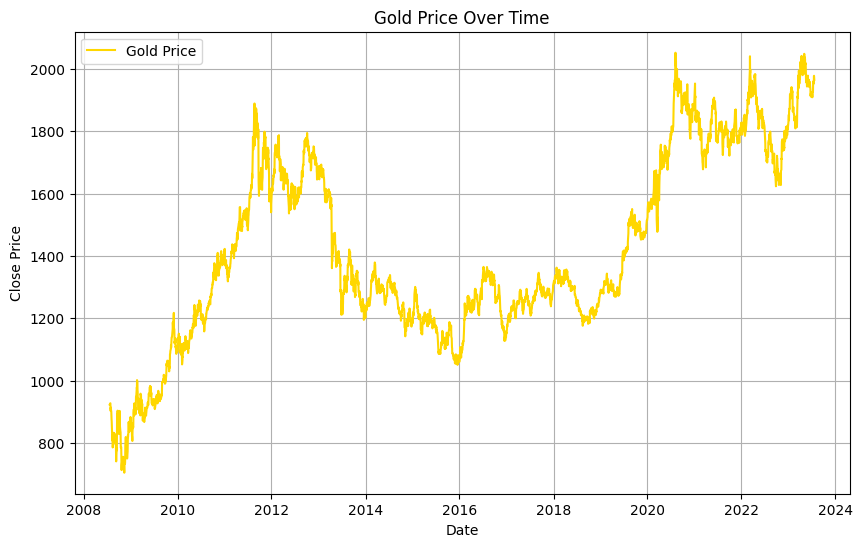

In [ ]:
# Step 5: Visualizations
# Line plot of gold price over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Close"], label="Gold Price", color="gold")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Gold Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

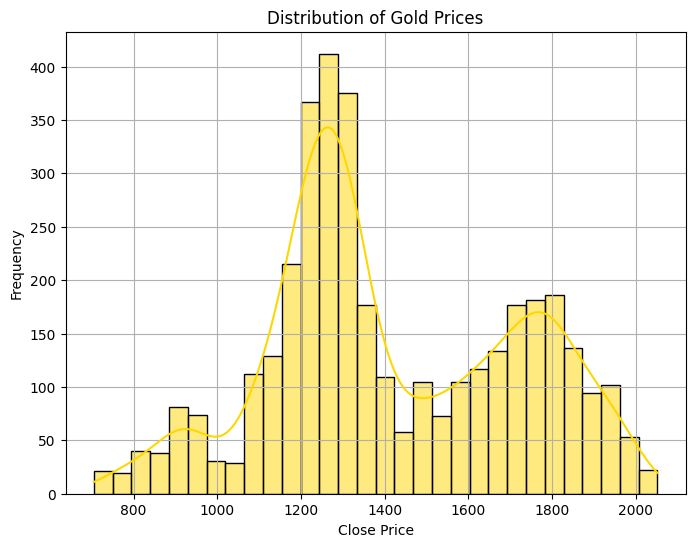

In [ ]:
# Step 6: Additional EDA (optional)
# You can explore other visualizations like histograms, distribution plots, etc.
# For example, to see the distribution of gold prices:
plt.figure(figsize=(8, 6))
sns.histplot(df["Close"], bins=30, kde=True, color="gold")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title("Distribution of Gold Prices")
plt.grid(True)
plt.show()

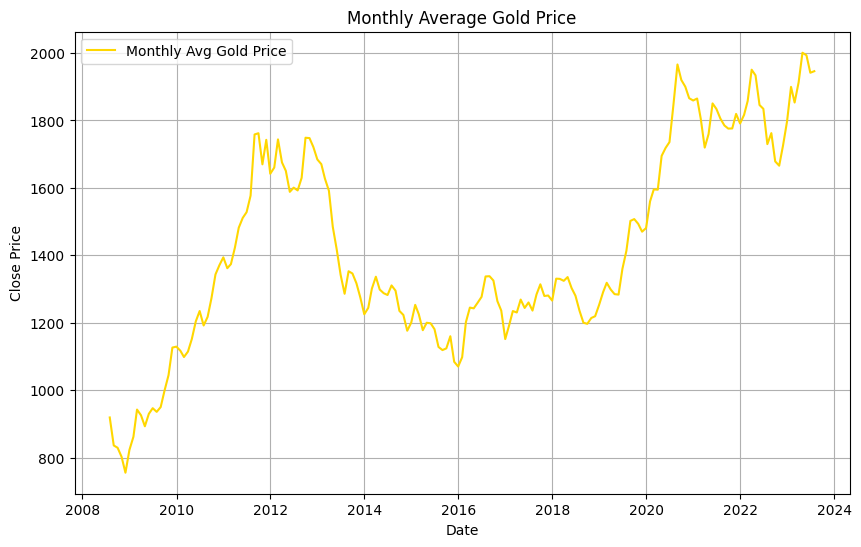

In [ ]:
# Monthly average gold prices over the years
df_monthly_avg = df.resample('M').mean()  # Resample to monthly frequency and calculate the mean
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_avg.index, df_monthly_avg["Close"], label="Monthly Avg Gold Price", color="gold")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Monthly Average Gold Price")
plt.legend()
plt.grid(True)
plt.show()



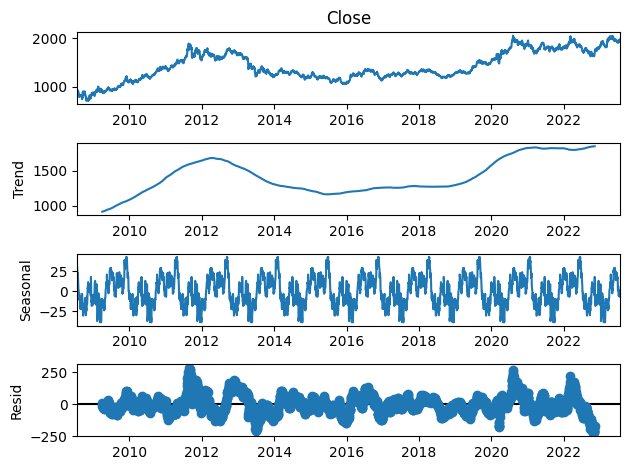

In [ ]:
# Step 7: Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"], model='add', period=350) # Assuming yearly seasonality
result.plot()
plt.show()

In [ ]:
train_data = df.iloc[:-365]
test_data = df.iloc[-365:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


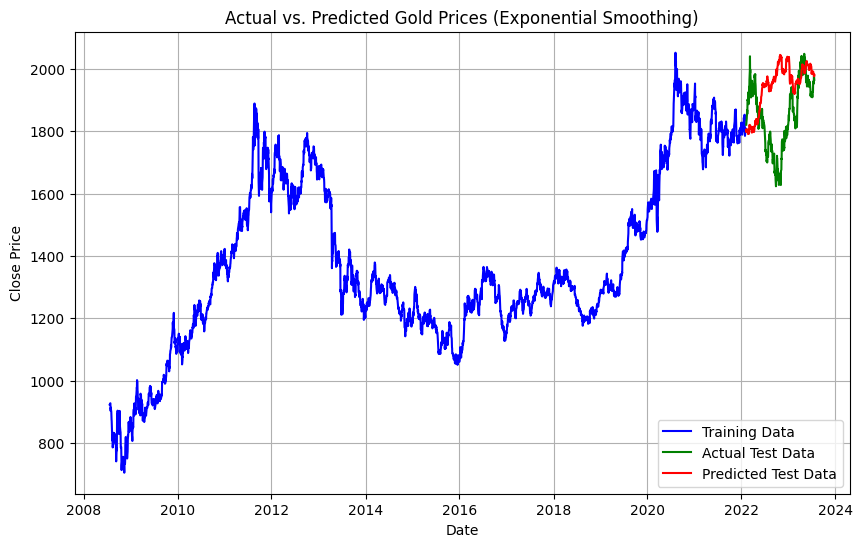

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
# Step 5: Exponential Smoothing model training
model = ExponentialSmoothing(train_data["Close"], trend="add", seasonal="add", seasonal_periods=350)
results = model.fit()

# Step 6: Model evaluation
predictions = results.forecast(len(test_data))

# Step 7: Plot the actual vs. predicted gold prices
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data["Close"], label="Training Data", color="blue")
plt.plot(test_data.index, test_data["Close"], label="Actual Test Data", color="green")
plt.plot(test_data.index, predictions, label="Predicted Test Data", color="red")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs. Predicted Gold Prices (Exponential Smoothing)")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


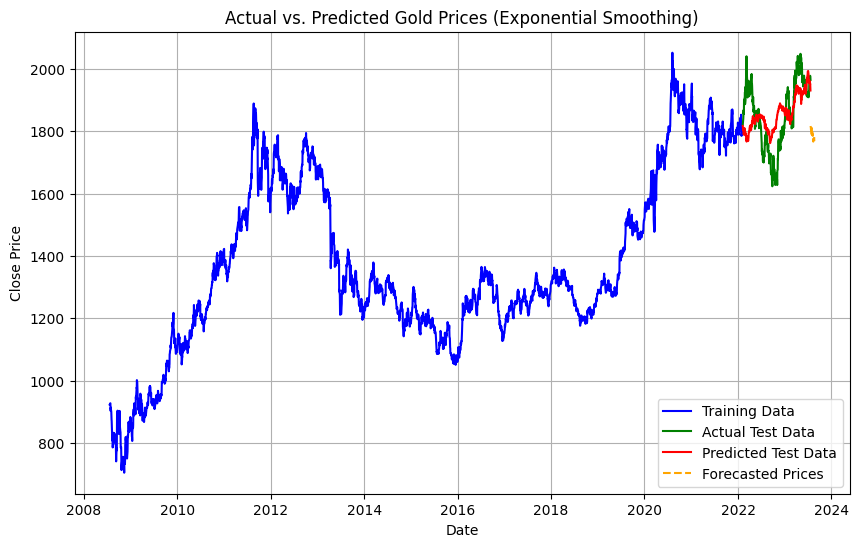

            Forecasted_Price
Date                        
2023-07-22       1816.526349
2023-07-23       1813.249909
2023-07-24       1812.116946
2023-07-25       1804.470950
2023-07-26       1806.575666
2023-07-27       1789.087180
2023-07-28       1789.745687
2023-07-29       1792.597885
2023-07-30       1790.187871
2023-07-31       1810.230877
2023-08-01       1808.657088
2023-08-02       1805.722446
2023-08-03       1796.835372
2023-08-04       1796.477704
2023-08-05       1797.165410
2023-08-06       1786.651075
2023-08-07       1790.830095
2023-08-08       1787.024886
2023-08-09       1786.319981
2023-08-10       1770.827054
2023-08-11       1768.367130
2023-08-12       1766.565978
2023-08-13       1775.710037
2023-08-14       1770.750310
2023-08-15       1772.311540
2023-08-16       1778.795301
2023-08-17       1783.275832
2023-08-18       1783.272628
2023-08-19       1780.071097
2023-08-20       1768.280538


In [ ]:
# Step 5: Exponential Smoothing model training
model = ExponentialSmoothing(train_data["Close"], trend="add", seasonal="mul", seasonal_periods=365)
results = model.fit()

# Step 6: Model evaluation
predictions = results.forecast(len(test_data))

# Step 7: Plot the actual vs. predicted gold prices
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data["Close"], label="Training Data", color="blue")
plt.plot(test_data.index, test_data["Close"], label="Actual Test Data", color="green")
plt.plot(test_data.index, predictions, label="Predicted Test Data", color="red")

# Step 8: Forecast for 30 more days in the future
future_dates = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq="D")
future_predictions = results.forecast(len(future_dates))

# Combine forecasted dates with forecasted values in a new DataFrame
forecast_df = pd.DataFrame({"Date": future_dates, "Forecasted_Price": future_predictions})
forecast_df.set_index("Date", inplace=True)

plt.plot(forecast_df.index, forecast_df["Forecasted_Price"], label="Forecasted Prices", color="orange", linestyle="--")

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs. Predicted Gold Prices (Exponential Smoothing)")
plt.legend()
plt.grid(True)
plt.show()

# Display the forecasted prices for the next 30 days
print(forecast_df)

In [ ]:
# Save the model as a pickle file
import pickle
with open("exponential_smoothing_model.pkl", "wb") as f:
    pickle.dump(results, f)
